Data Cleaning & EDA

1. Importing libraries and our raw data

In [2]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

#import SK learn to split our data into train and test sets
from sklearn.model_selection import train_test_split

In [3]:
#import data downloaded from baseball-reference.com. I needed 3 separate datasets because they each contain different categories that I will be using for my analysis
advanced_batting = pd.read_csv('datasets/raw_advanced_batting.csv')
standard_batting = pd.read_csv('datasets/raw_standard_batting.csv')
value_batting = pd.read_csv('datasets/raw_value_batting.csv')

#adjust size of columns to display in preview since we have a lot of categories to start off
pd.options.display.max_columns = 99

In [4]:
#preview our data
advanced_batting.head()

,Rk,Name,Age,Tm,PA,rOBA,Rbat+,BAbip,ISO,HR%,SO%,BB%,EV,HardH%,LD%,GB%,FB%,GB/FB,Pull%,Cent%,Oppo%,WPA,cWPA,RE24
0,1,Cory Abbott\abbotco01,25,CHC,3,0.267,55.0,0.500,0.000,0.0%,33.3%,0.0%,68.4,0.0%,0.0%,100.0%,0.0%,NaN,50.0%,50.0%,0.0%,0.0,0.0%,-0.1
1,2,José Abreu\abreujo02,34,CHW,659,0.358,126.0,0.293,0.219,4.6%,21.7%,9.3%,92.0,49.4%,21.7%,47.3%,25.6%,0.90,25.2%,57.7%,17.1%,1.6,0.9%,30.1
2,3,Ronald Acuna Jr.\acunaro01,23,ATL,360,0.420,156.0,0.311,0.313,6.7%,23.6%,13.6%,93.8,54.9%,29.0%,31.8%,30.9%,0.47,33.2%,55.3%,11.5%,2.6,1.4%,22.4
3,4,Willy Adames\adamewi01,25,TOT,555,0.358,124.0,0.331,0.219,4.5%,28.1%,10.3%,89.5,44.7%,21.6%,37.1%,36.0%,0.59,30.7%,52.9%,16.4%,3.1,2.3%,16.9
4,5,Willy Adames\adamewi01,25,TBR,142,0.282,84.0,0.276,0.174,3.5%,35.9%,7.0%,88.5,44.4%,18.5%,30.9%,39.5%,0.45,25.9%,56.8%,17.3%,0.3,0.2%,-1.0


In [5]:
standard_batting.head()

,Rk,Name,Age,Tm,Lg,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP
0,1,Fernando Abad*\abadfe01,35.0,BAL,AL,2,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0
1,2,Cory Abbott\abbotco01,25.0,CHC,NL,8,3,3,0,1,0,0,0,0,0,0,0,1,0.333,0.333,0.333,0.667,81.0,1,0
2,3,Albert Abreu\abreual01,25.0,NYY,AL,3,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0
3,4,Bryan Abreu\abreubr01,24.0,HOU,AL,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0
4,5,José Abreu\abreujo02,34.0,CHW,AL,152,659,566,86,148,30,2,30,117,1,0,61,143,0.261,0.351,0.481,0.831,126.0,272,28


In [6]:
value_batting.head()

,Rk,Name,Age,Tm,G,PA,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR▼,waaWL%,162WL%,oWAR,dWAR,oRAR
0,1,Marcus Semien\semiema01,30,TOR,162,724,26,4,2,12,5,49,5.0,23,72,7.3,0.530,0.530,6.0,1.8,60
1,2,Carlos Correa\correca01,26,HOU,148,640,25,-2,-1,20,8,50,5.2,21,71,7.2,0.534,0.531,5.2,2.9,51
2,3,Juan Soto*\sotoju01,22,WSN,151,654,57,-3,-1,4,-5,51,5.0,22,73,7.1,0.534,0.532,6.8,-0.2,69
3,4,Vladimir Guerrero Jr.\guerrvl02,22,TOR,161,698,58,-2,-3,2,-10,45,4.6,23,68,6.8,0.527,0.527,6.6,-0.7,66
4,5,Jose Ramirez#\ramirjo01,28,CLE,152,636,27,7,0,10,1,45,4.6,22,67,6.7,0.530,0.528,5.7,1.2,57


In [7]:
len(advanced_batting), len(standard_batting), len(value_batting)

(1267, 1724, 1508)

2. Combining the data into one dataset

In [8]:
#I am going to combine the three datasets into one dataframe so it is easier to work with
dataset = standard_batting.merge(value_batting, how='inner', on='Name')

In [9]:
dataset.head(), len(dataset)

(   Rk_x                     Name  Age_x Tm_x  Lg  G_x  PA_x   AB   R    H  2B  \
 0     1  Fernando Abad*\abadfe01   35.0  BAL  AL    2     0    0   0    0   0   
 1     2    Cory Abbott\abbotco01   25.0  CHC  NL    8     3    3   0    1   0   
 2     3   Albert Abreu\abreual01   25.0  NYY  AL    3     0    0   0    0   0   
 3     4    Bryan Abreu\abreubr01   24.0  HOU  AL    1     0    0   0    0   0   
 4     5     José Abreu\abreujo02   34.0  CHW  AL  152   659  566  86  148  30   
 
    3B  HR  RBI  SB  CS  BB   SO     BA    OBP    SLG    OPS   OPS+   TB  GDP  \
 0   0   0    0   0   0   0    0    NaN    NaN    NaN    NaN    NaN    0    0   
 1   0   0    0   0   0   0    1  0.333  0.333  0.333  0.667   81.0    1    0   
 2   0   0    0   0   0   0    0    NaN    NaN    NaN    NaN    NaN    0    0   
 3   0   0    0   0   0   0    0    NaN    NaN    NaN    NaN    NaN    0    0   
 4   2  30  117   1   0  61  143  0.261  0.351  0.481  0.831  126.0  272   28   
 
    Rk_y  Age_y Tm

In [10]:
batting = dataset.merge(advanced_batting, how='inner', on='Name')

In [11]:
batting.head(), len(batting)

(   Rk_x                        Name  Age_x Tm_x   Lg  G_x  PA_x   AB   R    H  \
 0     2       Cory Abbott\abbotco01   25.0  CHC   NL    8     3    3   0    1   
 1     5        José Abreu\abreujo02   34.0  CHW   AL  152   659  566  86  148   
 2     6  Ronald Acuna Jr.\acunaro01   23.0  ATL   NL   82   360  297  72   84   
 3     8      Willy Adames\adamewi01   25.0  TOT  MLB  140   555  497  77  130   
 4     8      Willy Adames\adamewi01   25.0  TOT  MLB  140   555  497  77  130   
 
    2B  3B  HR  RBI  SB  CS  BB   SO     BA    OBP    SLG    OPS   OPS+   TB  \
 0   0   0   0    0   0   0   0    1  0.333  0.333  0.333  0.667   81.0    1   
 1  30   2  30  117   1   0  61  143  0.261  0.351  0.481  0.831  126.0  272   
 2  19   1  24   52  17   6  49   85  0.283  0.394  0.596  0.990  155.0  177   
 3  32   1  25   73   5   4  57  156  0.262  0.337  0.481  0.818  119.0  239   
 4  32   1  25   73   5   4  57  156  0.262  0.337  0.481  0.818  119.0  239   
 
    GDP  Rk_y  Age_y Tm_

3. Clean dataset

In [12]:
#setting the player rank as the index to remove the preset index column
rk_batting = batting.set_index('Rk')

In [13]:
rk_batting.head()

,Rk_x,Name,Age_x,Tm_x,Lg,G_x,PA_x,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,Rk_y,Age_y,Tm_y,G_y,PA_y,Rbat,Rbaser,Rdp,Rfield,Rpos,RAA,WAA,Rrep,RAR,WAR▼,waaWL%,162WL%,oWAR,dWAR,oRAR,Age,Tm,PA,rOBA,Rbat+,BAbip,ISO,HR%,SO%,BB%,EV,HardH%,LD%,GB%,FB%,GB/FB,Pull%,Cent%,Oppo%,WPA,cWPA,RE24
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,Cory Abbott\abbotco01,25.0,CHC,NL,8,3,3,0,1,0,0,0,0,0,0,0,1,0.333,0.333,0.333,0.667,81.0,1,0,473,25,CHC,8,3,0,0,0,0,0,0,0.0,0,0,0.0,0.504,0.500,0.0,0.0,0,25,CHC,3,0.267,55.0,0.500,0.000,0.0%,33.3%,0.0%,68.4,0.0%,0.0%,100.0%,0.0%,NaN,50.0%,50.0%,0.0%,0.0,0.0%,-0.1
2,5,José Abreu\abreujo02,34.0,CHW,AL,152,659,566,86,148,30,2,30,117,1,0,61,143,0.261,0.351,0.481,0.831,126.0,272,28,97,34,CHW,152,659,20,1,-3,-1,-9,7,0.9,22,29,3.0,0.505,0.505,3.1,-0.9,30,34,CHW,659,0.358,126.0,0.293,0.219,4.6%,21.7%,9.3%,92.0,49.4%,21.7%,47.3%,25.6%,0.90,25.2%,57.7%,17.1%,1.6,0.9%,30.1
3,6,Ronald Acuna Jr.\acunaro01,23.0,ATL,NL,82,360,297,72,84,19,1,24,52,17,6,49,85,0.283,0.394,0.596,0.990,155.0,177,0,64,23,ATL,82,360,23,2,0,2,-3,25,2.4,12,37,3.6,0.531,0.515,3.4,-0.1,35,23,ATL,360,0.420,156.0,0.311,0.313,6.7%,23.6%,13.6%,93.8,54.9%,29.0%,31.8%,30.9%,0.47,33.2%,55.3%,11.5%,2.6,1.4%,22.4
4,8,Willy Adames\adamewi01,25.0,TOT,MLB,140,555,497,77,130,32,1,25,73,5,4,57,156,0.262,0.337,0.481,0.818,119.0,239,9,38,25,2TM,140,555,16,-1,0,1,7,23,2.3,19,42,4.2,0.517,0.510,4.1,0.8,41,25,TOT,555,0.358,124.0,0.331,0.219,4.5%,28.1%,10.3%,89.5,44.7%,21.6%,37.1%,36.0%,0.59,30.7%,52.9%,16.4%,3.1,2.3%,16.9
5,8,Willy Adames\adamewi01,25.0,TOT,MLB,140,555,497,77,130,32,1,25,73,5,4,57,156,0.262,0.337,0.481,0.818,119.0,239,9,38,25,2TM,140,555,16,-1,0,1,7,23,2.3,19,42,4.2,0.517,0.510,4.1,0.8,41,25,TBR,142,0.282,84.0,0.276,0.174,3.5%,35.9%,7.0%,88.5,44.4%,18.5%,30.9%,39.5%,0.45,25.9%,56.8%,17.3%,0.3,0.2%,-1.0


In [14]:
#Time to drop all of the columns I will not be usings for this project. I only intend to keep rank, Name, PA, AB, R, HR, RBI, BA, OPS, WAR, HardH%, and EV. Other categories could be useful but for the intentions of this project I will only be using these.   
batters =rk_batting.drop(columns=['Rk_x', 'Age_x', 'Tm_x', 'Lg', 'G_x', 'PA_x', 'H', '2B', '3B', 'SB', 'CS', 'BB', 'SO', 'OBP', 'SLG', 'OPS+', 'TB', 'GDP', 'Rk_y', 'Age_y', 'Tm_y', 'G_y', 'PA_y', 'Rbat', 'Rbaser', 'Rdp', 'Rfield', 'Rpos', 'RAA', 'WAA', 'Rrep', 'RAR', 'waaWL%', '162WL%', 'oWAR', 'dWAR', 'oRAR', 'Age', 'Tm', 'rOBA', 'Rbat+', 'BAbip', 'ISO', 'HR%', 'SO%', 'BB%', 'LD%', 'GB%', 'FB%', 'GB/FB', 'Pull%', 'Cent%', 'Oppo%', 'WPA', 'cWPA', 'RE24'])

In [15]:
print(batters.columns.tolist())

['Name', 'AB', 'R', 'HR', 'RBI', 'BA', 'OPS', 'WAR▼', 'PA', 'EV', 'HardH%']


In [16]:
batters.head()

,Name,AB,R,HR,RBI,BA,OPS,WAR▼,PA,EV,HardH%
Rk,,,,,,,,,,,
1,Cory Abbott\abbotco01,3,0,0,0,0.333,0.667,0.0,3,68.4,0.0%
2,José Abreu\abreujo02,566,86,30,117,0.261,0.831,3.0,659,92.0,49.4%
3,Ronald Acuna Jr.\acunaro01,297,72,24,52,0.283,0.990,3.6,360,93.8,54.9%
4,Willy Adames\adamewi01,497,77,25,73,0.262,0.818,4.2,555,89.5,44.7%
5,Willy Adames\adamewi01,497,77,25,73,0.262,0.818,4.2,142,88.5,44.4%


In [17]:
batters.shape

(1167, 11)

In [18]:
#now that we have only the columns we want we need to remove the batters that have a small sample size (pitchers, call-ups, etc.). I first considered removing anyone who does not qualify for the batting title (3.1 PA per team game) but I think that would make the dataset too small as we are only dealing with 1 season of data. Instead I am going to remove anyone with under 100 Plate appearances
qualified_batters = batters[batters['PA'] >= 100]

In [19]:
qualified_batters.shape

(432, 11)

In [20]:
qualified_batters.dtypes

Name       object
AB          int64
R           int64
HR          int64
RBI         int64
BA        float64
OPS       float64
WAR▼      float64
PA          int64
EV        float64
HardH%     object
dtype: object

In [21]:
#I need to convert the Hard Hit% to a float and remove the % symbol
qualified_batters['HardH%'] = qualified_batters['HardH%'].str.rstrip('%').astype(float)/100

/tmp/ipykernel_8248/2356636828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualified_batters['HardH%'] = qualified_batters['HardH%'].str.rstrip('%').astype(float)/100


In [22]:
qualified_batters.head(10)

,Name,AB,R,HR,RBI,BA,OPS,WAR▼,PA,EV,HardH%
Rk,,,,,,,,,,,
2,José Abreu\abreujo02,566,86,30,117,0.261,0.831,3.0,659,92.0,0.494
3,Ronald Acuna Jr.\acunaro01,297,72,24,52,0.283,0.990,3.6,360,93.8,0.549
4,Willy Adames\adamewi01,497,77,25,73,0.262,0.818,4.2,555,89.5,0.447
5,Willy Adames\adamewi01,497,77,25,73,0.262,0.818,4.2,142,88.5,0.444
6,Willy Adames\adamewi01,497,77,25,73,0.262,0.818,4.2,413,89.8,0.448
4,Willy Adames\adamewi01,132,16,5,15,0.197,0.625,4.2,555,89.5,0.447
5,Willy Adames\adamewi01,132,16,5,15,0.197,0.625,4.2,142,88.5,0.444
6,Willy Adames\adamewi01,132,16,5,15,0.197,0.625,4.2,413,89.8,0.448
4,Willy Adames\adamewi01,365,61,20,58,0.285,0.886,4.2,555,89.5,0.447


In [23]:
#for the last stage of cleaning lets drop duplicates and make sure there are no null values. There shouldn't be any null values but there are duplicates as the dataset listed players who were traded with a stat line for each team and a total line.
qualified_batters = qualified_batters.drop_duplicates(subset=['Name'])

In [24]:
len(qualified_batters)

258

In [25]:
qualified_batters.isna().sum()

Name      0
AB        0
R         0
HR        0
RBI       0
BA        0
OPS       0
WAR▼      0
PA        0
EV        0
HardH%    0
dtype: int64

In [26]:
qualified_batters.head(30)

,Name,AB,R,HR,RBI,BA,OPS,WAR▼,PA,EV,HardH%
Rk,,,,,,,,,,,
2,José Abreu\abreujo02,566,86,30,117,0.261,0.831,3.0,659,92.0,0.494
3,Ronald Acuna Jr.\acunaro01,297,72,24,52,0.283,0.990,3.6,360,93.8,0.549
4,Willy Adames\adamewi01,497,77,25,73,0.262,0.818,4.2,555,89.5,0.447
8,Riley Adams\adamsri03,99,13,2,10,0.222,0.742,0.5,120,88.4,0.424
11,Jo Adell\adelljo01,130,17,4,26,0.246,0.703,0.3,140,85.8,0.320
14,Jesus Aguilar\aguilje01,449,49,22,93,0.261,0.788,1.4,510,89.6,0.410
15,Nick Ahmed\ahmedni01,434,46,5,38,0.221,0.619,0.7,473,86.2,0.279
19,Hanser Alberto\alberha01,241,25,2,24,0.270,0.693,0.4,255,83.9,0.303
24,Jorge Alfaro\alfarjo01,295,22,4,30,0.244,0.625,-0.4,311,90.9,0.492


4. Exploratory Data Analysis

Let's get an idea of our data distribution for our dataset and our selected values

In [32]:
qualified_batters.corr()

,AB,R,HR,RBI,BA,OPS,WAR▼,PA,EV,HardH%
AB,1.000000,0.931266,0.737855,0.893801,0.441870,0.439203,0.666738,0.997300,0.312120,0.259642
R,0.931266,1.000000,0.815109,0.889851,0.495291,0.597927,0.796626,0.940450,0.388249,0.350806
HR,0.737855,0.815109,1.000000,0.912542,0.333050,0.672050,0.712410,0.749960,0.583417,0.568077
RBI,0.893801,0.889851,0.912542,1.000000,0.456906,0.617038,0.726428,0.898108,0.508362,0.466001
BA,0.441870,0.495291,0.333050,0.456906,1.000000,0.770935,0.618574,0.434902,0.252302,0.249717
OPS,0.439203,0.597927,0.672050,0.617038,0.770935,1.000000,0.730940,0.457448,0.551971,0.575422
WAR▼,0.666738,0.796626,0.712410,0.726428,0.618574,0.730940,1.000000,0.678210,0.405101,0.376935
PA,0.997300,0.940450,0.749960,0.898108,0.434902,0.457448,0.678210,1.000000,0.329025,0.276365
EV,0.312120,0.388249,0.583417,0.508362,0.252302,0.551971,0.405101,0.329025,1.000000,0.926236
HardH%,0.259642,0.350806,0.568077,0.466001,0.249717,0.575422,0.376935,0.276365,0.926236,1.000000


In [31]:
qualified_batters.corr()['WAR▼'].sort_values(ascending=False)

WAR▼      1.000000
R         0.796626
OPS       0.730940
RBI       0.726428
HR        0.712410
PA        0.678210
AB        0.666738
BA        0.618574
EV        0.405101
HardH%    0.376935
Name: WAR▼, dtype: float64

<AxesSubplot:xlabel='HardH%', ylabel='WAR▼'>

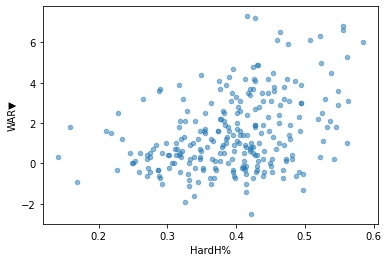

In [42]:
qualified_batters.plot.scatter(x='HardH%', y='WAR▼', alpha=.5)

In [27]:
qualified_batters['WAR▼'].describe()

count    258.000000
mean       1.480620
std        1.852817
min       -2.500000
25%        0.100000
50%        1.000000
75%        2.600000
max        7.300000
Name: WAR▼, dtype: float64

<AxesSubplot:ylabel='Frequency'>

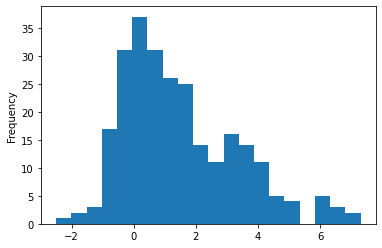

In [28]:
qualified_batters['WAR▼'].plot.hist(bins=20)

<AxesSubplot:>

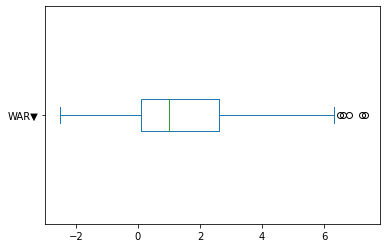

In [35]:
qualified_batters['WAR▼'].plot.box(vert=False)

In [29]:
qualified_batters['HardH%'].describe()

count    258.000000
mean       0.394089
std        0.080889
min        0.141000
25%        0.339250
50%        0.402000
75%        0.446750
max        0.584000
Name: HardH%, dtype: float64

<AxesSubplot:ylabel='Frequency'>

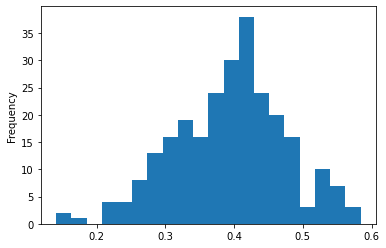

In [30]:
qualified_batters['HardH%'].plot.hist(bins=20)

<AxesSubplot:>

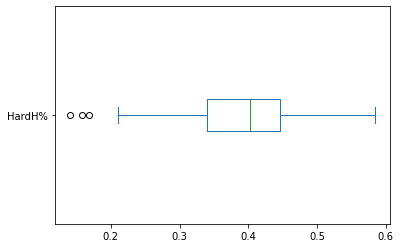

In [36]:
qualified_batters['HardH%'].plot.box(vert=False)

5. Train Test Split


In [33]:
#split data into a train a test set to perform our regression with machine learning. I split this into 70/30 training/test
train, test = train_test_split(qualified_batters, test_size=0.3, random_state=42, shuffle=True)

In [34]:
#Save test and train data to path to be worked on in another notebook
train.to_csv(r'datasets/clean_train', index = False)
test.to_csv(r'datasets/clean_test', index = False)